## Data preprocessing 

This section i will do the fellow: 
1. Read the data and data quality analysis 
3. Deal the null data and duplicate data 
4. Data organize: structure the new column or remove non useful column and 

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings(action = "ignore")

# 读取数据
data4 = pd.read_csv('../源数据/订单表2018-4.csv', encoding='gbk')
data5 = pd.read_csv('../源数据/订单表2018-5.csv', encoding='gbk')
data6 = pd.read_csv('../源数据/订单表2018-6.csv', encoding='gbk')
data7 = pd.read_csv('../源数据/订单表2018-7.csv', encoding='gbk')
data8 = pd.read_csv('../源数据/订单表2018-8.csv', encoding='gbk')
data9 = pd.read_csv('../源数据/订单表2018-9.csv', encoding='gbk')
# 查看数据维度
print(data4.shape, data5.shape, data6.shape, data7.shape, data8.shape, data9.shape)

# 合并数据
data = pd.concat([data4, data5, data6, data7, data8, data9], ignore_index=True)
print('订单表合并后的形状为', data.shape)
print(data[:10])

# 自定义analysis函数，实现数据信息探索的描述性统计分析和缺失值分析
def analysis(data):
    # 计算偏度和峰度
    skewness = data.skew()
    kurt = data.kurtosis()
    description = data.describe()
    description.loc['skewness'] = skewness
    description.loc['kurtosis'] = kurt
    # 计算每一列的重复值个数
    duplicates = data.duplicated().sum()
    duplicates_by_column = data.apply(lambda x: x.duplicated().sum()) # each
    print('数据相关信息：\n', data.info())
    print('描述性统计分析结果为：\n', description.T)
    print('各属性缺失值占比为：\n', 100*(data.isnull().sum() / len(data)))
    print('\n 全部重复值个数: {} ,占比： {}'.format(duplicates,100*(duplicates / len(data))))
    print('各属性重复值占比为：\n', 100*(duplicates_by_column / len(data))) # 注意此时重复值很多需考虑真实场景


analysis(data)

(2077, 15) (46068, 15) (51925, 15) (77644, 15) (86459, 15) (86723, 15)
订单表合并后的形状为 (350896, 15)
     设备编号             下单时间                    订单编号  购买数量（个）  手续费（元）  总金额（元）  \
0  112531  2018/4/30 22:55  112531qr15251001151105        1    0.03     2.5   
1  112657  2018/4/30 19:58  112657qr15250895096590        1    0.03     3.0   
2  112657  2018/4/30 17:26  112657qr15250803914099        1    0.03     2.5   
3  112539  2018/4/30 16:26  112539qr15250768111957        1    0.03     3.0   
4  112673  2018/4/30 13:39  112673qr15250667659247        1    0.03     3.0   
5  112673  2018/4/30 13:14  112673qr15250652455454        1    0.03     3.0   
6  112701  2018/4/29 14:43  112701qr15249842283261        1    0.03     3.0   
7  112691  2018/4/29 14:28  112691qr15249833017881        1    0.03     3.0   
8  112637  2018/4/29 12:29  112637qr15249761462361        1    0.03     2.5   
9  112637  2018/4/29 12:28  112637qr15249761129083        1    0.03     2.5   

  支付状态  出货状态    收款方  退款金额（元）       

缺失值处理

In [4]:
# 删除缺失值（缺失数据多可直接删除）
print('未做删除缺失值前订单表行列数目为：', data.shape)
data = data.dropna(how='any')  # 删除缺失值(任意)
print('删除完缺失值后订单表行列数目为：', data.shape)

未做删除缺失值前订单表行列数目为： (350896, 15)
删除完缺失值后订单表行列数目为： (350617, 15)


数据规约

In [5]:
# 从省市区中提取市的信息，并创建新属性
data['市'] = data['省市区'].str[3: 6]
data.head()

,设备编号,下单时间,订单编号,购买数量（个）,手续费（元）,总金额（元）,支付状态,出货状态,收款方,退款金额（元）,购买用户,商品ID,商品详情,省市区,软件版本,市
0,112531,2018/4/30 22:55,112531qr15251001151105,1,0.03,2.5,微信,出货成功,鑫零售结算,0.0,os-xL0q3NG6YFG7PJrF2x7QaS23E,商品0001,可口可乐X1;,广东省中山市,V2.1.55/1.2;rk3288,中山市
1,112657,2018/4/30 19:58,112657qr15250895096590,1,0.03,3.0,微信,出货成功,鑫零售结算,0.0,os-xL0t1Iiu4imdMmWBeLdY0GKwE,商品0001,可口可乐X1;,广东省广州市番禺区,V3.0.38;rk3288;(900x1440),广州市
2,112657,2018/4/30 17:26,112657qr15250803914099,1,0.03,2.5,微信,出货成功,鑫零售结算,0.0,ooCjVwHPz_xuuMWqMcvqK2YAjCOE,商品0001,可口可乐 罐X1;,广东省广州市番禺区,V3.0.33;rk3288;(900x1440),广州市
3,112539,2018/4/30 16:26,112539qr15250768111957,1,0.03,3.0,微信,出货成功,鑫零售结算,0.0,os-xL0n3Z8WVdeNH4iX78JAnNVTQ,商品0001,可口可乐X1;,广东省广州市番禺区,V3.0.38;rk3288;(900x1440),广州市
4,112673,2018/4/30 13:39,112673qr15250667659247,1,0.03,3.0,微信,出货成功,鑫零售结算,0.0,os-xL0t_qepcnYIyc_Ug53RkRWKs,商品0001,可口可乐X1;,广东省佛山市南海区,V3.0.37;rk3288;(900x1440),佛山市


In [6]:
# 定义一个需剔除的字符的列表error_str （无用字符）
error_str = [' ', '(', ')', '（', '）', '0', '1', '2', '3', '4', '5', '6',
             '7', '8', '9', 'g', 'l', 'm', 'M', 'L', '听', '特', '饮', '罐',
             '瓶', '只', '装', '欧', '式', '&', '%', 'X', 'x', ';']
# 使用循环剔除指定字符
for i in error_str:
    data['商品详情'] = data['商品详情'].str.replace(i, '')
# 新建“商品名称”属性，用于新数据的存放
data['商品名称'] = data['商品详情']

# 删除金额较少的订单前的数据行列数目
print(data.shape)
# 删除金额较少的订单后的数据行列数目
data = data[data['总金额（元）'] >= 0.5]
print(data.shape)

# 对于订单表数据选择合适的属性（删除没有需要的列）
data = data.drop(['手续费（元）', '收款方', '软件版本', '省市区', '商品详情', '退款金额（元）'], axis=1)
print('选择后，数据属性为：\n', data.columns.values)
data.head()

(350617, 17)
(350450, 17)
选择后，数据属性为：
 ['设备编号' '下单时间' '订单编号' '购买数量（个）' '总金额（元）' '支付状态' '出货状态' '购买用户' '商品ID' '市'
 '商品名称']


,设备编号,下单时间,订单编号,购买数量（个）,总金额（元）,支付状态,出货状态,购买用户,商品ID,市,商品名称
0,112531,2018/4/30 22:55,112531qr15251001151105,1,2.5,微信,出货成功,os-xL0q3NG6YFG7PJrF2x7QaS23E,商品0001,中山市,可口可乐
1,112657,2018/4/30 19:58,112657qr15250895096590,1,3.0,微信,出货成功,os-xL0t1Iiu4imdMmWBeLdY0GKwE,商品0001,广州市,可口可乐
2,112657,2018/4/30 17:26,112657qr15250803914099,1,2.5,微信,出货成功,ooCjVwHPz_xuuMWqMcvqK2YAjCOE,商品0001,广州市,可口可乐
3,112539,2018/4/30 16:26,112539qr15250768111957,1,3.0,微信,出货成功,os-xL0n3Z8WVdeNH4iX78JAnNVTQ,商品0001,广州市,可口可乐
4,112673,2018/4/30 13:39,112673qr15250667659247,1,3.0,微信,出货成功,os-xL0t_qepcnYIyc_Ug53RkRWKs,商品0001,佛山市,可口可乐


提取不同时间粒度，以进行不同时间尺度分析

In [8]:
# 将时间格式的字符串转换为标准日期时间
data['下单时间'] = pd.to_datetime(data['下单时间'])
data['小时'] = data['下单时间'].dt.hour  # 提取时间中的小时，将其赋给新列小时
data['月份'] = data['下单时间'].dt.month
data['下单时间段'] = 'time'  # 新增一列下单时间段，并将其初始化为time
# 考虑到时间属性为连续数据，不好分析，将其离散化便于分析
exp1 = data['小时'] <= 5  # 判断小时是否小于等于5
# 若条件为真，则时间段为凌晨
data.loc[exp1, '下单时间段'] = '凌晨'
# 判断小时是否大于5且小于等于8
exp2 = (5 < data['小时']) & (data['小时'] <= 8)
# 若条件为真，则时间段为早晨
data.loc[exp2, '下单时间段'] = '早晨'
# 判断小时是否大于8且小于等于11
exp3 = (8 < data['小时']) & (data['小时'] <= 11)
# 若条件为真，则时间段为上午
data.loc[exp3, '下单时间段'] = '上午'
# 判断小时是否小大于11且小于等于13
exp4 = (11 < data['小时']) & (data['小时'] <= 13)
# 若条件为真，则时间段为中午
data.loc[exp4, '下单时间段'] = '中午'
# 判断小时是否大于13且小于等于16
exp5 = (13 < data['小时']) & (data['小时'] <= 16)
# 若条件为真，则时间段为下午
data.loc[exp5, '下单时间段'] = '下午'
# 判断小时是否大于16且小于等于19
exp6 = (16 < data['小时']) & (data['小时'] <= 19)
# 若条件为真，则时间段为傍晚
data.loc[exp6, '下单时间段'] = '傍晚'
# 判断小时是否大于19且小于等于24
exp7 = (19 < data['小时']) & (data['小时'] <= 24)
# 若条件为真，，则时间段为晚上
data.loc[exp7, '下单时间段'] = '晚上'
data.head()
# data.to_csv('../预处理后数据/order.csv', index=False, encoding='gbk')

,设备编号,下单时间,订单编号,购买数量（个）,总金额（元）,支付状态,出货状态,购买用户,商品ID,市,商品名称,小时,月份,下单时间段
0,112531,2018-04-30 22:55:00,112531qr15251001151105,1,2.5,微信,出货成功,os-xL0q3NG6YFG7PJrF2x7QaS23E,商品0001,中山市,可口可乐,22,4,晚上
1,112657,2018-04-30 19:58:00,112657qr15250895096590,1,3.0,微信,出货成功,os-xL0t1Iiu4imdMmWBeLdY0GKwE,商品0001,广州市,可口可乐,19,4,傍晚
2,112657,2018-04-30 17:26:00,112657qr15250803914099,1,2.5,微信,出货成功,ooCjVwHPz_xuuMWqMcvqK2YAjCOE,商品0001,广州市,可口可乐,17,4,傍晚
3,112539,2018-04-30 16:26:00,112539qr15250768111957,1,3.0,微信,出货成功,os-xL0n3Z8WVdeNH4iX78JAnNVTQ,商品0001,广州市,可口可乐,16,4,下午
4,112673,2018-04-30 13:39:00,112673qr15250667659247,1,3.0,微信,出货成功,os-xL0t_qepcnYIyc_Ug53RkRWKs,商品0001,佛山市,可口可乐,13,4,中午


## Data visualization analysis

### Sales data analysis

In [9]:
import pandas as pd
import numpy as np
from pyecharts.charts import Line
from pyecharts import options as opts
import matplotlib.pyplot as plt
from pyecharts.charts import Bar
from pyecharts.charts import Pie
from pyecharts.charts import Grid

def f(x):
    return len(list(set((x.values))))
# 绘制销售额和自动售货机数量之间的关系图
groupby1 = data.groupby(by='月份', as_index=False).agg({'设备编号': f, '总金额（元）': np.sum})
groupby1.columns = ['月份', '设备数量', '销售额']
line = (Line()
        .add_xaxis([str(i) for i in groupby1['月份'].values.tolist()])
        .add_yaxis('销售额', np.round(groupby1['销售额'].values.tolist(), 2))
        .add_yaxis('设备数量', groupby1['设备数量'].values.tolist(), yaxis_index=1,symbol='triangle')
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='top', font_size=10))
        .set_global_opts(
            xaxis_opts=opts.AxisOpts(name='月份', name_location='center', name_gap=25),
            title_opts=opts.TitleOpts(title='销售额和自动售货机数量之间的关系'),
            yaxis_opts=opts.AxisOpts( name='销售额（元）', name_location='center', name_gap=60,
                axislabel_opts=opts.LabelOpts(
                formatter='{value}')))
        .extend_axis(
            yaxis=opts.AxisOpts( name='设备数量（台）', name_location='center', name_gap=40,
                axislabel_opts=opts.LabelOpts(
                formatter='{value}'), interval=50))
        )
line.render_notebook()

可以明显看到设备数量与销售同比增长，目前大部分区域中自动售货机还是市场的

<Figure size 1440x576 with 0 Axes>

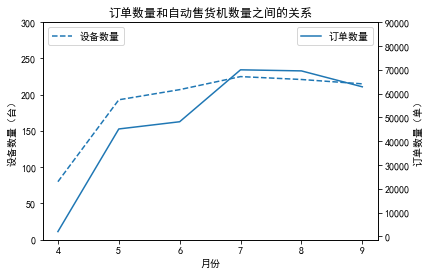

In [10]:
# 绘制订单数量和自动售货机数量之间的关系图
groupby2 = data.groupby(by='月份', as_index=False).agg({'设备编号': f, '订单编号': f})
groupby2.columns = ['月份', '设备数量', '订单数量']
# 绘制图形
plt.figure(figsize=(20, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots()  # 使用subplots函数创建窗口
ax1.plot(groupby2['月份'], groupby2['设备数量'], '--')
ax1.set_yticks(range(0, 350, 50))  # 设置y1轴的刻度范围
ax1.legend(('设备数量',), loc='upper left', fontsize=10)
ax2 = ax1.twinx()  # 创建第二个坐标轴
ax2.plot(groupby2['月份'], groupby2['订单数量'])
ax2.set_yticks(range(0, 100000, 10000))  # 设置y2轴的刻度范围
ax2.legend(('订单数量',), loc='upper right', fontsize=10)
ax1.set_xlabel('月份')
ax1.set_ylabel('设备数量（台）')
ax2.set_ylabel('订单数量（单）')
plt.title('订单数量和自动售货机数量之间的关系')
plt.show()

同上一样，订单数量随着售货机数量一样增高

### Product sales analysis

In [11]:
# 销售额前10的商品
group4 = data.groupby(by='商品名称', as_index=False)['总金额（元）'].sum()
group4.sort_values(by='总金额（元）', ascending=False, inplace=True)
d = group4.iloc[: 10]
x_data = d['商品名称'].values.tolist()
y_data = np.round(d['总金额（元）'].values, 2).tolist()
bar = (Bar(init_opts=opts.InitOpts(width='800px',height='600px'))
       .add_xaxis(x_data)
       .add_yaxis('', y_data, label_opts=opts.LabelOpts(font_size=15))
       .set_global_opts(title_opts=opts.TitleOpts(title='畅销前10的商品'),
                        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(
                            formatter='{value}',font_size=15)),
                        xaxis_opts=opts.AxisOpts(type_='category',
                            axislabel_opts=opts.LabelOpts({'interval': '0'}, font_size=15, rotate=30))))
bar.render_notebook()


 在畅销的产品中，要注意是否存在商品畅销不够货的情况及时补货或加大货架位

In [12]:
# 销售额后10的商品
h = group4.iloc[-10: ]
x_data = h['商品名称'].values.tolist()
y_data = np.round(h['总金额（元）'].values, 2).tolist()
bar = (Bar()
       .add_xaxis(x_data)
       .add_yaxis('', y_data, label_opts=opts.LabelOpts(position='right'))
       .set_global_opts(title_opts=opts.TitleOpts(
                        title='滞销后10的商品'),
                        xaxis_opts=opts.AxisOpts(
                            axislabel_opts={'interval': '0'}))
       .reversal_axis()
       )
grid=Grid(init_opts=opts.InitOpts(width='600px',height='400px'))
grid.add(bar,grid_opts=opts.GridOpts(pos_left='18%'))
grid.render_notebook()


对于滞销商品进行更换或促销活动

### City sales analysis

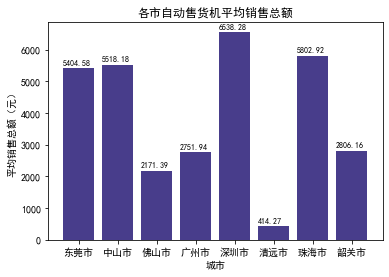

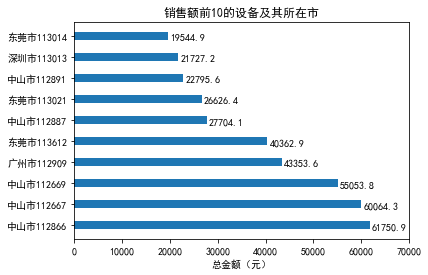

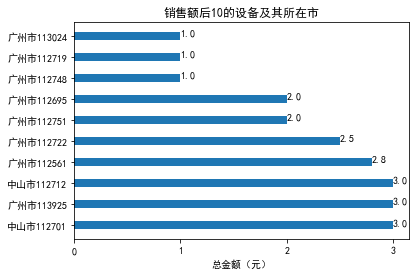

In [13]:
# 各城市自动售货机平均销售总额
gruop3 = data.groupby(by='市', as_index=False).agg({'总金额（元）':sum, '设备编号':f})
gruop3['销售总额'] = np.round(gruop3['总金额（元）'], 2)
gruop3['平均销售总额'] = np.round(gruop3['销售总额'] / gruop3['设备编号'], 2)
plt.bar(gruop3['市'].values.tolist(), gruop3['平均销售总额'].values.tolist(), color='#483D8B')
# 给条形图添加数据标注
for x, y in enumerate(gruop3['平均销售总额'].values):
    plt.text(x - 0.4, y + 100, '%s' %y, fontsize=8)
plt.xlabel('城市')
plt.ylabel('平均销售总额（元）')
plt.title('各市自动售货机平均销售总额')
plt.show()


# 各自动售货机的销售总金额
group5 = data.groupby(by=['市', '设备编号'], as_index=False)['总金额（元）'].sum()
group5.sort_values(by='总金额（元）', ascending=False, inplace=True)
b = group5[: 10]
label = []
# 销售额前10的设备及其所在市
for i in range(len(b)):
    a = b.iloc[i, 0] + str(b.iloc[i, 1])
    label.append(a)
x = np.round(b['总金额（元）'], 2).values.tolist()
y = range(10)
plt.bar(x=0, bottom=y, height=0.4, width=x, orientation='horizontal')
plt.xticks(range(0, 80000, 10000))  # 设置x轴的刻度范围
plt.yticks(range(10), label)
for y, x in enumerate(np.round(b['总金额（元）'], 2).values):
    plt.text(x + 500, y - 0.2, "%s" %x)
plt.xlabel('总金额（元）')
plt.title('销售额前10的设备及其所在市')
plt.show()


# 销售额后10的设备及其所在市
l = group5[-10: ]
label1 = []
for i in range(len(l)):
    a = l.iloc[i, 0] + str(l.iloc[i, 1])
    label1.append(a)
x = np.round(l['总金额（元）'], 2).values.tolist()
y = range(10)
plt.bar(x=0, bottom=y, height=0.4, width=x, orientation='horizontal')
plt.xticks(range(0, 4, 1))  # 设置x轴的刻度范围
plt.yticks(range(10), label1)
for y, x in enumerate(np.round(l['总金额（元）'], 2).values):
    plt.text(x, y, "%s" %x)
plt.xlabel('总金额（元）')
plt.title('销售额后10的设备及其所在市')
plt.show()


可以看到深圳特区作为一线城市，人流量很高，销售数据非常可观，而相对同样作为一线城市的广州销售数据却不太好看，销售倒数的设备几乎都是广州市，大致是因为售货机位置摆放不佳，建议多放在人流多的地方

In [14]:
# 统计各城市销售额小于100的设备数量
l_b = group5[group5['总金额（元）'] < 100]
lb = l_b.groupby(by='市', as_index=False)['设备编号'].count()
x_data = lb['市'].values.tolist()
y_data = lb['设备编号'].values.tolist()
bar = (Bar(init_opts=opts.InitOpts(width='500px', height='400px'))
       .add_xaxis(x_data)
       .add_yaxis('', y_data)
       .set_global_opts(title_opts=opts.TitleOpts(
                title='各市销售额小于100的设备数量'))
       )
bar.render_notebook()

同样的，广州市和中山市同样存在售货机排放位置不佳等其他原因

### User sales analysis

In [15]:
# 订单支付方式占比
group6 = data.groupby(by='支付状态')['支付状态'].count()
method = group6.index.tolist()
num = group6.values.tolist()
pie_data = [(i, j) for i, j in zip(method, num)]
pie = (Pie()
     .add('', pie_data, label_opts=opts.LabelOpts(formatter='{b}:{c}({d}%)'))
     .set_global_opts(title_opts=opts.TitleOpts(title='订单支付方式占比')))
pie.render_notebook()

微信已成为大部分用户的首选支付

In [16]:
# 各时间段的订单用户占比
group7 = data.groupby(by='下单时间段')['购买用户'].count()
times = group7.index.tolist()
num = group7.values.tolist()
pie_data_2 = [(i, j) for i, j in zip(times, num)]
pie = (Pie()
       .add('', pie_data_2, label_opts=opts.LabelOpts(formatter='{b}:{c}({d}%)'),
            radius=[60, 200], rosetype='radius', is_clockwise=False)
       .set_global_opts(title_opts=opts.TitleOpts(title='各消费时段的订单用户占比'))
       )
pie.render_notebook()

大部分用户下午室外活动，消费流高

## Data Mining
This part I will do fellow:
1. Predict the sales data with difference time
2. Maybe can find some correlation with each product.
3. Find the core feature in product (Decision Tree)

### Predict the sales

#### ARIMA model based on time series (For example as Foshan)

Actually, we need to structure eight city model to predict

Resample based on day and week

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA

data = pd.read_csv('../预处理后数据/order.csv', encoding='gbk')
# 提取出货状态为“出货成功”的下单时间和总金额（元）数据
data_info = data.loc[(data['出货状态'] == '出货成功') & (data["市"] == "佛山市"), ['下单时间', '总金额（元）']]
data_info = data_info.set_index('下单时间')  # 将下单时间设为索引
# 将索引修改为日期时间格式 
data_info.index = pd.to_datetime(data_info.index)
# 按周、月、日对总金额进行汇总，即求和
data_w = data_info.resample('W').sum() 
# data_m = data_info.resample('M').sum() 
data_d = data_info.resample('D').sum() 
# data_d

Checking the autocorrelation

In [18]:
# 定义绘制自相关图&偏相关函数
def draw_acf_pcf(ts):
    sample_size = len(ts)
    max_lags = sample_size // 2 - 1  # 设置最大滞后期数为样本大小的50%
    plt.figure(facecolor='white', figsize=(10, 8))
    plot_acf(ts)
    plot_pacf(ts,lags = max_lags)
    plt.title('自相关图')
    plt.show()
# 定义单位根检验函数
def testStationarity(ts):
    dftest = ADF(ts)
    # 对ADF求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used',
                                               'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

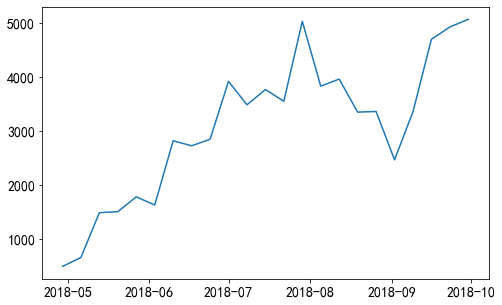

<Figure size 720x576 with 0 Axes>

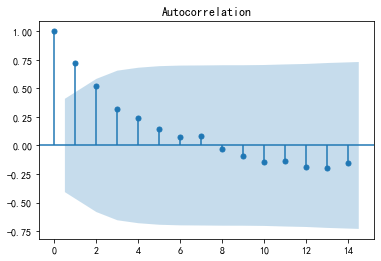

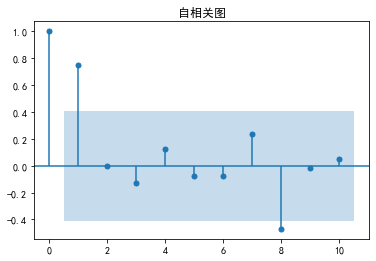

单位根检验结果为（周）：
 Test Statistic                 -0.694629
p-value                         0.848136
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


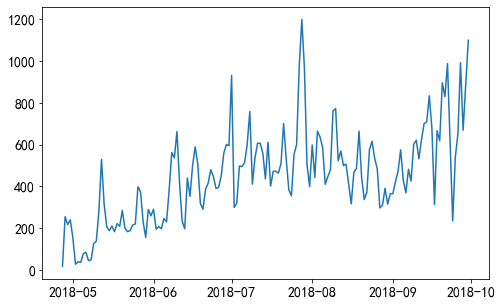

<Figure size 720x576 with 0 Axes>

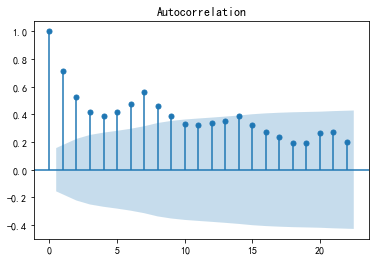

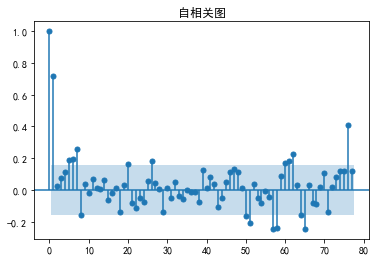

单位根检验结果为（日）：
 Test Statistic                  -1.425103
p-value                          0.570184
#Lags Used                       8.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


In [19]:
# 平稳性检验
# 判断是否为时间序列
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签 
plt.rcParams['axes.unicode_minus'] = False  # 显示负号 
plt.figure(figsize=(8, 5))
plt.plot(data_w)
plt.tick_params(labelsize=14)  # 设置坐标轴字体大小
plt.show()

# 自相关
draw_acf_pcf(data_w)
# 单位根检验
print('单位根检验结果为（周）：\n', testStationarity(data_w))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签 
plt.rcParams['axes.unicode_minus'] = False  # 显示负号 
plt.figure(figsize=(8, 5))
plt.plot(data_d)
plt.tick_params(labelsize=14)  # 设置坐标轴字体大小
plt.show()
# 自相关
draw_acf_pcf(data_d)
# 单位根检验
print('单位根检验结果为（日）：\n', testStationarity(data_d))

Week

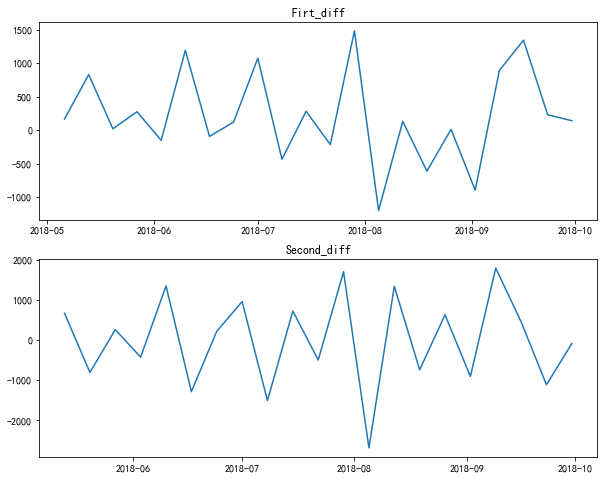

<Figure size 720x576 with 0 Axes>

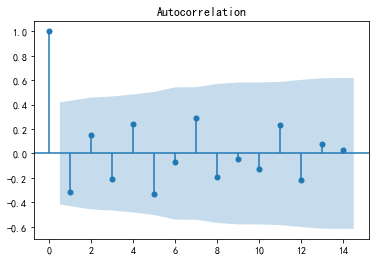

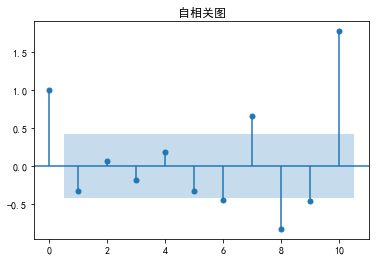

一阶差分单位根检验结果为：
 Test Statistic                 -1.907483
p-value                         0.328549
#Lags Used                      8.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64
一阶差分Ljung-Box白噪声检验结果：
    lb_stat  lb_pvalue
1  2.526532   0.111946
2  3.136157   0.208445
3  4.356713   0.225433
4  6.079926   0.193258


<Figure size 720x576 with 0 Axes>

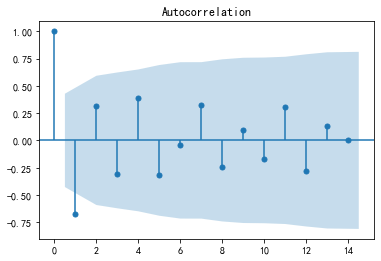

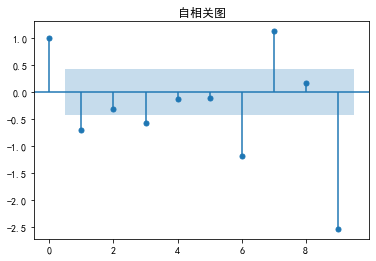

二阶差分单位根检验结果为：
 Test Statistic                 -3.975701
p-value                         0.001543
#Lags Used                      5.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64
二阶差分Ljung-Box白噪声检验结果：
     lb_stat  lb_pvalue
1  11.068754   0.000878
2  13.622838   0.001101
3  16.195226   0.001034
4  20.421521   0.000412


In [21]:
# 一、二阶差分处理
data_w_T1 = data_w.diff().dropna()
data_w_T2 = data_w_T1.diff().dropna()
# 差分后的时间序列图
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(data_w_T1)
plt.title("Firt_diff")
plt.subplot(2,1,2)
plt.plot(data_w_T2,label="Second_diff")
plt.title("Second_diff")
plt.show()


# 差分自相关
draw_acf_pcf(data_w_T1)
# 差分单位根检验
print('一阶差分单位根检验结果为：\n', testStationarity(data_w_T1))
# 白噪声检验
print("一阶差分Ljung-Box白噪声检验结果：")
print(acorr_ljungbox(data_w_T1, lags=4,return_df=True))
# 差分自相关
draw_acf_pcf(data_w_T2)
# 差分单位根检验
print('二阶差分单位根检验结果为：\n', testStationarity(data_w_T2))
# 白噪声检验
print("二阶差分Ljung-Box白噪声检验结果：")
print(acorr_ljungbox(data_w_T2, lags=4,return_df=True))

After the second order difference data , P-value have less than 0.05, so second order difference can be used

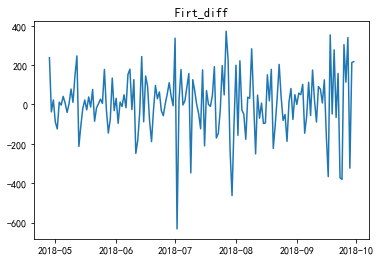

<Figure size 720x576 with 0 Axes>

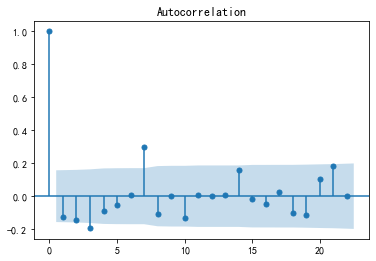

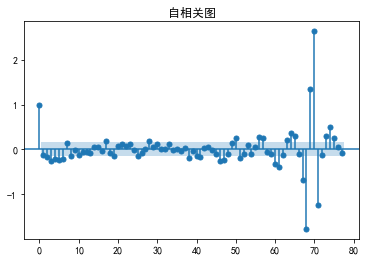

一阶差分单位根检验结果为：
 Test Statistic                -6.540854e+00
p-value                        9.355008e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.480000e+02
Critical Value (1%)           -3.475325e+00
Critical Value (5%)           -2.881275e+00
Critical Value (10%)          -2.577293e+00
dtype: float64
一阶差分白噪声检验结果为：
      lb_stat  lb_pvalue
1   2.634472   0.104567
2   5.904123   0.052232
3  12.073879   0.007134
4  13.426333   0.009370
5  13.880354   0.016388


In [24]:
# 一、二阶差分处理
data_d_T1 = data_d.diff().dropna()
# 差分后的时间序列图
# plt.figure(figsize=(10, 8))
plt.plot(data_d_T1)
plt.title("Firt_diff")
plt.show()

# 差分自相关
draw_acf_pcf(data_d_T1)
# 差分单位根检验
print('一阶差分单位根检验结果为：\n', testStationarity(data_d_T1))
# 白噪声检验
print('一阶差分白噪声检验结果为：\n', acorr_ljungbox(data_d_T1, lags=5,return_df=True))

Data resampled by day have a good stationarity 

##### Predict bases on data resampled by week

In [19]:
# 通过BIC矩阵进行模型定阶 
data_w = data_w.astype(float) 
pmax = 3
qmax = 3
bic_matrix = []  # 初始化BIC矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data_w, (p, 2, q)).fit().bic)   
        except:
            tmp.append(None)
        bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix)
# 找出最小值位置
p, q = bic_matrix.stack().idxmin()
print('当BIC最小时，p值和q值分别为: ', p, q)

# 构建ARIMA(0, 2, 0)模型
model = ARIMA(data_w, (p, 2, q)).fit()

# 预测未来4周的销售额
print('预测未来4周的销售额，其预测结果、标准误差、置信区间如下。\n', model.forecast(4))

D:\acaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


当BIC最小时，p值和q值分别为:  0 1
预测未来4周的销售额，其预测结果、标准误差、置信区间如下。
 (array([5187.50524852, 5299.13672794, 5403.09443826, 5499.37837947]), array([ 697.65439271,  986.63235949, 1208.37299018, 1395.30902077]), array([[3820.12776515, 6554.8827319 ],
       [3365.37283735, 7232.90061853],
       [3034.72689762, 7771.4619789 ],
       [2764.62295146, 8234.13380749]]))


##### Predict bases on data resampled by day

In [10]:
# 通过BIC矩阵进行模型定阶
data_d = data_d.astype(float) 
pmax = 5
qmax = 5
bic_matrix = []  # 初始化BIC矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data_d, (p, 1, q)).fit().bic)   
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix)
# 找出最小值位置
p, q = bic_matrix.stack().idxmin() # 将列标签置换成二级行标签（去除空值），idxmin通过两级行标签得到对应索引
print('当BIC最小时，p值和q值分别为: ', p, q)

# 构建ARIMA(0, 1, 0)模型
model = ARIMA(data_d, (p, 1, q)).fit()

# 预测未来7天的销售额
print('预测未来7天的销售额，其预测结果、标准误差、置信区间如下。\n', model.forecast(7))

D:\acaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\acaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


当BIC最小时，p值和q值分别为:  2 4
预测未来7天的销售额，其预测结果、标准误差、置信区间如下。
 (array([809.33560879, 713.20270779, 778.37154759, 863.56481679,
       906.7218726 , 878.19891768, 803.46536282]), array([129.15780043, 144.47174226, 147.46097844, 150.19170541,
       152.24505158, 153.7604047 , 155.18125465]), array([[ 556.19097162, 1062.48024596],
       [ 430.04329619,  996.3621194 ],
       [ 489.35334073, 1067.38975445],
       [ 569.19448341, 1157.93515016],
       [ 608.32705468, 1205.11669053],
       [ 576.83406221, 1179.56377314],
       [ 499.31569263, 1107.61503301]]))


### Regression the sales
In this part, I will use the LSTM which in deel learning field

In [36]:
data_d

,总金额（元）
下单时间,
2018-04-27,16.5
2018-04-28,254.5
2018-04-29,217.0
2018-04-30,240.0
2018-05-01,151.6
...,...
2018-09-26,652.1
2018-09-27,992.3
2018-09-28,668.9


In [64]:
from sklearn.model_selection import train_test_split
# train_data,test_data,train_target,test_target = train_test_split(data_d.values, target,shuffle=False)
train_data, test_data = data_d[:130], data_d[130:]


def slip_windows(x, steps=50):
    """
    :param x: Array-like data (one dimension)
    :param steps: slip step
    """
    assert len(x) > steps, "参数应大于等于steps"

    data = []
    target = []
    for i in range(len(x) - steps):
        data.append(x[i:i + steps])
        target.append(x[i+steps])
    return np.array(data), np.array(target)


scale = MinMaxScaler()
scale.fit(train_data)
train_data = scale.transform(train_data)
test_data = scale.transform(test_data)

train_data, train_target = slip_windows(
    train_data, steps=12)  # 根据bic准则确定 steps
test_data, test_target = slip_windows(test_data, steps=12)

# data.reshape(data.shape[0],data.shape[1])
print(train_data.shape)
train_target.shape

(118, 12, 1)


(118, 1)

#### model consturct

In [110]:
from keras import layers
from keras.metrics import MSE
from keras.models import Model
from keras.losses import mse
# from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from keras.activations import leaky_relu


inputs = layers.Input(shape=(12, 1))
# x = layers.LSTM(64, return_sequences=True)(inputs)
x = layers.LSTM(8)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation=leaky_relu)(inputs)
x = layers.Dense(8, activation=leaky_relu)(x)
output = layers.Dense(1, activation="relu")(x)

model = Model(inputs, output)
model.compile(optimizer='rmsprop', loss=mse)
model.fit(train_data, train_target, epochs=20,
          validation_split=0.2, shuffle=False)

Epoch 1/20
3/3 [==============================] - 1s 75ms/step - loss: 0.1095 - val_loss: 0.0650
Epoch 2/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0787 - val_loss: 0.0445
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0606 - val_loss: 0.0298
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0471 - val_loss: 0.0205
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0382 - val_loss: 0.0148
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 0.0323 - val_loss: 0.0114
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0284 - val_loss: 0.0096
Epoch 8/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0259 - val_loss: 0.0088
Epoch 9/20
3/3 [==============================] - 0s 13ms/step - loss: 0.0244 - val_loss: 0.0086
Epoch 10/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0236 - val_loss: 0.0088
Epoch 11/20
3/3 [============

#### Model visualization and evaluate

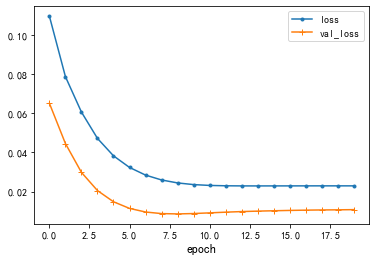

In [111]:
import matplotlib.pyplot as plt

history = model.history
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure()
plt.plot(loss,label="loss",marker= '.')
plt.plot(val_loss,label="val_loss",marker = '+')
plt.xlabel("epoch",fontsize=12)
plt.legend()

In [123]:
# plt.plot(model.predict(train_data))
evaluate = model.evaluate(test_data,test_target)

scale.inverse_transform(np.array(evaluate).reshape(-1,1))

1/1 [==============================] - 0s 19ms/step - loss: 0.0585


array([[85.75209239]])

visualization

### Clustering the person
In this section I will do the following:
1. Clustering to find some phenomena of interest
2. Visualize clustering results

The data includes order history, location data, and related time data.
So clustering can be done like this:
1. Based on purchase order behavior (√)
2. Based on location information (x)
3. Based on purchase time habits (x)

> 基于购买行为的聚类：将购买数量、总金额、支付状态、出货状态等信息作为特征，使用聚类算法（如K-means、DBSCAN等）对订单进行聚类。这样可以找到具有相似购买行为的订单群组，例如购买数量和总金额较大的订单群组，购买数量和总金额较小的订单群组等。

>基于地理位置的聚类：将市作为特征，使用地理聚类算法（如K-means、DBSCAN等）对订单进行聚类。这样可以将具有相似地理位置的订单归为一类，例如来自同一城市的订单群组。

>基于时间特征的聚类：将小时、月份、下单时间段作为特征，使用时间聚类算法（如K-means、DBSCAN等）对订单进行聚类。这样可以将具有相似下单时间分布的订单归为一类，例如下单时间集中在晚上的订单群组。

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action = "ignore")

data = pd.read_csv('../预处理后数据/order.csv', encoding='gbk')
# 提取出货状态为“出货成功”的下单时间和总金额（元）数据
cluster_data = data.loc[(data['出货状态'] == '出货成功') & (data["市"] == "佛山市"), ['购买数量（个）', '总金额（元）',"支付状态"]]
# cluster_data = data.drop(columns=["设备编号","订单编号","下单时间","商品名称\
# ","出货状态","购买用户","市","小时","月份","下单时间段","商品ID"])
cluster_data

,购买数量（个）,总金额（元）,支付状态
4,1,3.0,微信
5,1,3.0,微信
106,1,5.0,微信
108,1,5.0,微信
112,1,5.0,微信
...,...,...,...
350372,1,3.5,微信
350373,1,3.5,微信
350410,1,5.8,微信
350411,1,5.8,微信


In [2]:
print(cluster_data["支付状态"].unique())

['微信' '支付宝' '会员余额']


dummy data

In [3]:
from pandas import get_dummies
test = get_dummies(cluster_data,columns=["支付状态"])
test

,购买数量（个）,总金额（元）,支付状态_会员余额,支付状态_微信,支付状态_支付宝
4,1,3.0,0,1,0
5,1,3.0,0,1,0
106,1,5.0,0,1,0
108,1,5.0,0,1,0
112,1,5.0,0,1,0
...,...,...,...,...,...
350372,1,3.5,0,1,0
350373,1,3.5,0,1,0
350410,1,5.8,0,1,0
350411,1,5.8,0,1,0


[27342.245061258534, 28176.619996148413, 27895.532755785094, 29426.548698937684, 30756.016668065786, 31227.718583947455]


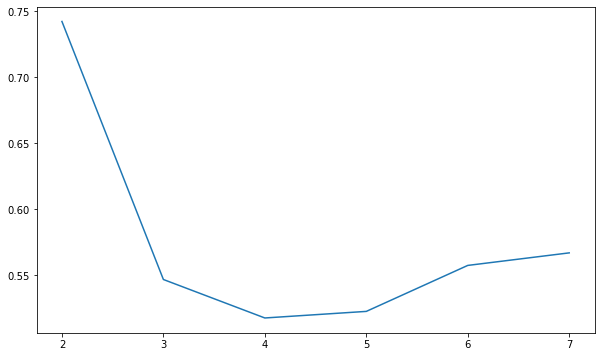

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score
import matplotlib.pyplot as plt
calinski_harabasz_scores = []
silhouette_scores = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i,max_iter=100).fit(test.values)
    calinski_harabasz_scores.append(calinski_harabasz_score(test.values,kmeans.labels_))
    silhouette_scores.append(silhouette_score(test.values,kmeans.labels_))

print(calinski_harabasz_scores)    
plt.figure(figsize=(10,6))
plt.plot(range(2,8),silhouette_scores,linewidth=1.5, linestyle="-")
plt.show()


In [40]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(test.values)
kmeans.labels_

array([0, 0, 2, ..., 2, 2, 0])

visualzation

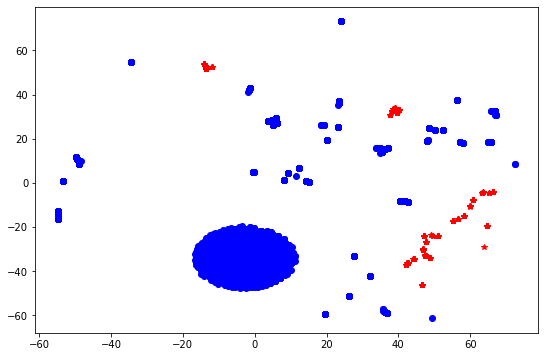

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt  # 使用TSNE进行数据降维，降成两维
tsne = TSNE(n_components=2, init='random',
            random_state=177).fit(test.values)
df = pd.DataFrame(tsne.embedding_)  # 将原始数据转换为DataFrame
df['labels'] = kmeans.labels_  # 将聚类结果存储进df数据表
# 提取不同标签的数据
df1 = df[df['labels'] == 0]
df2 = df[df['labels'] == 1]
# df3 = df[df['labels'] == 2]
# 绘制图形
fig = plt.figure(figsize=(9, 6))  # 设定空白画布，并制定大小#用不同的颜色表示不同数据
plt.plot(df1[0], df1[1],'bo',df2[0], df2[1], 'r*',)
#          df3[0], df3[1],'gD')
plt.show()  # 显示图片